In [68]:
import pandas as pd
import numpy as np

import matplotlib.dates as md
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

from pyemma import msm

import warnings
warnings.filterwarnings('ignore')

In [2]:
expedia = pd.read_csv('data/train.csv')

In [3]:
expedia.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [4]:
df = expedia.loc[expedia['prop_id'] == 104517]

In [5]:
# del expedia

In [6]:
df.head(2)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
746,63,2013-05-23 11:56:25,14,100,NaN,NaN,219,104517,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1255,90,2013-04-23 11:12:24,14,100,NaN,NaN,219,104517,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [7]:
df['price_usd'].describe()

count    4733.000000
mean      109.967372
std       124.660936
min         0.070000
25%        67.000000
50%        95.000000
75%       133.000000
max      5584.000000
Name: price_usd, dtype: float64

In [8]:
df['visitor_location_country_id'].value_counts()

219    3487
100     424
220     184
55      124
216      78
129      49
59       37
117      32
99       25
103      24
92       23
132      18
50       16
31       16
15       12
158      11
137      11
187      10
56        8
229       8
2         7
80        7
205       7
32        7
85        7
13        6
73        6
14        5
212       5
202       4
       ... 
23        2
33        2
72        2
215       2
53        2
77        2
104       1
37        1
68        1
223       1
81        1
113       1
211       1
203       1
79        1
47        1
11        1
214       1
194       1
186       1
178       1
162       1
154       1
138       1
130       1
70        1
30        1
149       1
133       1
18        1
Name: visitor_location_country_id, Length: 73, dtype: int64

In [9]:
df['srch_length_of_stay'].value_counts()
df['srch_length_of_stay'].describe()

count    4733.000000
mean        2.702726
std         1.757170
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        28.000000
Name: srch_length_of_stay, dtype: float64

In [10]:
df['srch_booking_window'].describe()

count    4733.000000
mean       48.443271
std        56.095770
min         0.000000
25%         9.000000
50%        28.000000
75%        64.000000
max       308.000000
Name: srch_booking_window, dtype: float64

In [11]:
df['srch_room_count'].describe()
df['srch_room_count'].value_counts()

1    4120
2     515
3      74
4      15
6       5
8       3
5       1
Name: srch_room_count, dtype: int64

In [12]:
df = df[df['srch_room_count'] == 1]
df = df[df['visitor_location_country_id'] == 219]

In [13]:
df.shape

(3049, 54)

In [14]:
print(df['date_time'].max(), df['date_time'].min())

2013-06-30 22:50:21 2012-11-01 02:48:30


In [15]:
df = df[['date_time', 'price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3049 entries, 2041 to 9917395
Data columns (total 4 columns):
date_time                   3049 non-null object
price_usd                   3049 non-null float64
srch_booking_window         3049 non-null int64
srch_saturday_night_bool    3049 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 119.1+ KB


In [17]:
df.head(3)

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool
2041,2013-03-14 11:27:28,206.0,99,1
3152,2013-01-03 20:48:24,186.0,6,0
5166,2013-01-19 16:51:27,61.0,1,0


In [18]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [19]:
df = df.sort_values('date_time')
df['price_usd'].describe()

count    3049.000000
mean      112.939023
std       113.374049
min         0.120000
25%        67.000000
50%       100.000000
75%       141.000000
max      5584.000000
Name: price_usd, dtype: float64

In [35]:
expedia[(expedia['visitor_location_country_id'] == 219) & (expedia['price_usd'] == 5584)]
# del expedia

In [21]:
df = df[df['price_usd'] < 5584]

Text(0.5,1,'Time Series of room price by date time of search')

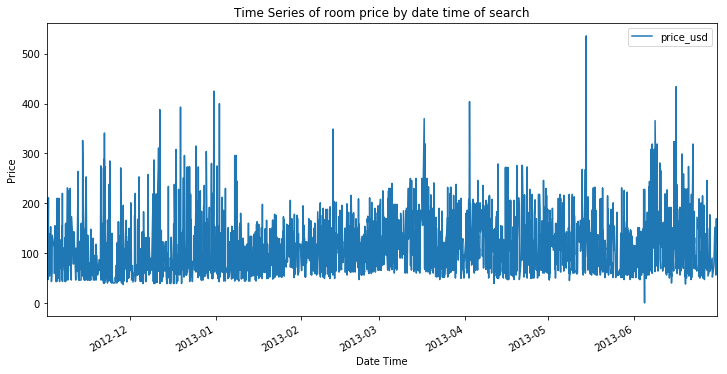

In [22]:
df.plot(x='date_time', y='price_usd', figsize=(12,6))
plt.xlabel('Date Time')
plt.ylabel('Price')
plt.title('Time Series of room price by date time of search')

In [23]:
df.head()

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool
3945840,2012-11-01 02:48:30,84.0,19,0
63387,2012-11-01 03:06:43,78.0,16,1
3352426,2012-11-01 09:04:18,114.0,56,1
5257418,2012-11-01 09:11:03,76.0,56,1
7091061,2012-11-01 10:15:25,128.0,0,1


Text(0.5,1,'Price of Saturday Hist')

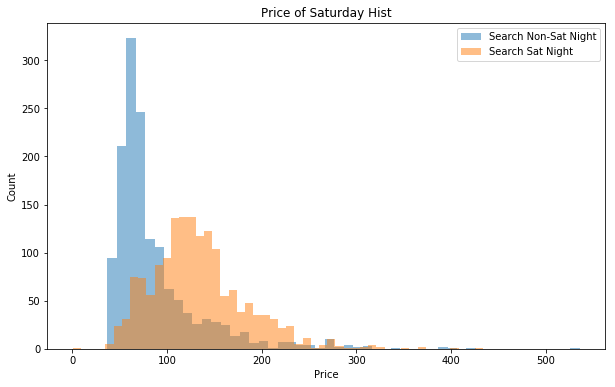

In [24]:
a = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
b = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']
plt.figure(figsize=(10,6))
plt.hist(a, bins=50, alpha=0.5, label='Search Non-Sat Night')
plt.hist(b, bins=50, alpha=0.5, label='Search Sat Night')
plt.legend(loc='upper right')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price of Saturday Hist')

In [25]:
df['srch_saturday_night_bool'].value_counts()

1    1599
0    1449
Name: srch_saturday_night_bool, dtype: int64

### Clustering-Based Anomaly Detection

k-means is a widely used clustering algorithm. It creates 'k' similar clusters of data points. Data instances that fall outside of these groups could potentially be marked as anomalies.

In [26]:
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
n_cluster = range(1,20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

Text(0.5,1,'Elbow Curve')

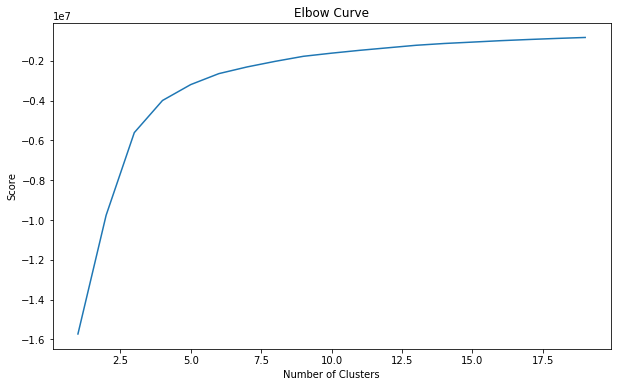

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

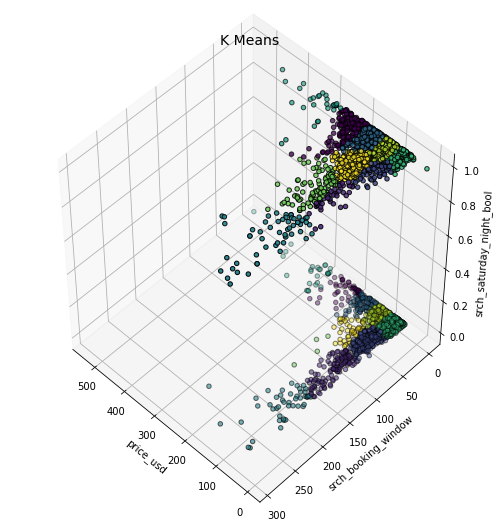

In [28]:
X = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_
# Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("price_usd")
ax.set_ylabel("srch_booking_window")
ax.set_zlabel("srch_saturday_night_bool")
plt.title("K Means", fontsize=14);

In [29]:
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = data.values
X_std = StandardScaler().fit_transform(X)

#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse=True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

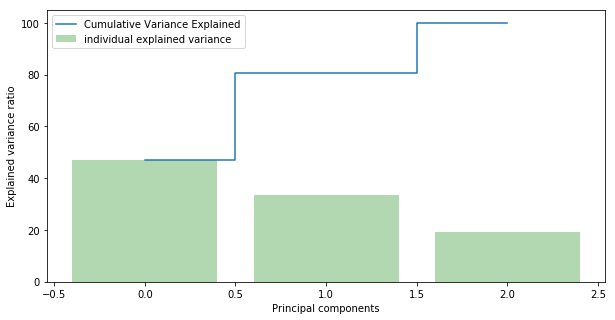

In [30]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)) ,var_exp, alpha=0.3, align='center', label='individual explained variance', color='g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid', label='Cumulative Variance Explained')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

In [31]:
# Take useful feature and standardize them
# data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)

# reduce to 2 important features
pca = PCA(n_components=2)
data = pca.fit_transform(data)

# standardize these 2 new features
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [32]:
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
df['cluster'] = kmeans[9].predict(data)
df.index = data.index
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]
df['cluster'].value_counts()

7    662
0    627
4    438
1    355
8    355
6    213
5    152
3    123
9     78
2     45
Name: cluster, dtype: int64

In [33]:
df.head()

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool,cluster,principal_feature1,principal_feature2
0,2012-11-01 02:48:30,84.0,19,0,7,-0.889864,-0.521900
1,2012-11-01 03:06:43,78.0,16,1,4,0.230566,-0.272218
2,2012-11-01 09:04:18,114.0,56,1,8,0.567439,0.546642
3,2012-11-01 09:11:03,76.0,56,1,8,0.155659,0.581776
4,2012-11-01 10:15:25,128.0,0,1,0,0.793675,-0.659305


### Clustering Approach

In [36]:
# return Series of distance between each point and its distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[9])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
df['anomaly1'] = (distance >= threshold).astype(int)

Text(0,0.5,'principal feature2')

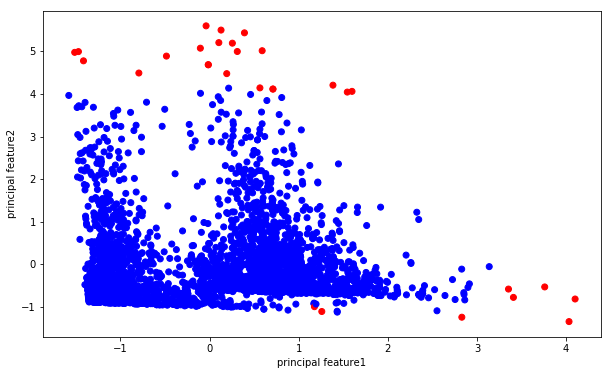

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df['anomaly1'].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')

In [44]:
df.anomaly1.value_counts()

0    3018
1      30
Name: anomaly1, dtype: int64

In [45]:
df.head()

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool,cluster,principal_feature1,principal_feature2,anomaly1
0,2012-11-01 02:48:30,84.0,19,0,7,-0.889864,-0.521900,0
1,2012-11-01 03:06:43,78.0,16,1,4,0.230566,-0.272218,0
2,2012-11-01 09:04:18,114.0,56,1,8,0.567439,0.546642,0
3,2012-11-01 09:11:03,76.0,56,1,8,0.155659,0.581776,0
4,2012-11-01 10:15:25,128.0,0,1,0,0.793675,-0.659305,0


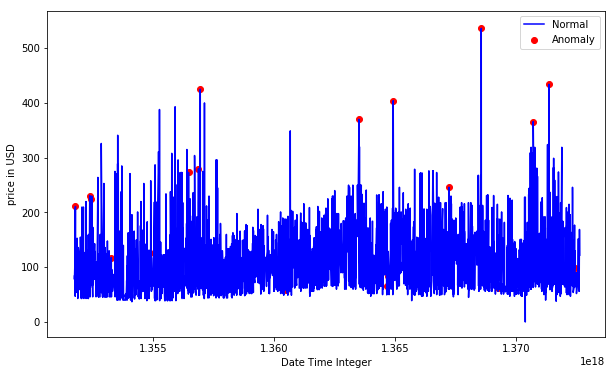

In [56]:
df = df.sort_values('date_time')
df['date_time_int'] = df.date_time.astype(np.int64)

a = df.loc[df['anomaly1'] == 1, ['date_time_int', 'price_usd']]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df['date_time_int'], df['price_usd'], color='blue', label="Normal")
ax.scatter(a['date_time_int'], a['price_usd'], color='red', label='Anomaly')
plt.xlabel('Date Time Integer')
plt.ylabel('price in USD')
plt.legend()

C:\Users\Sony\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


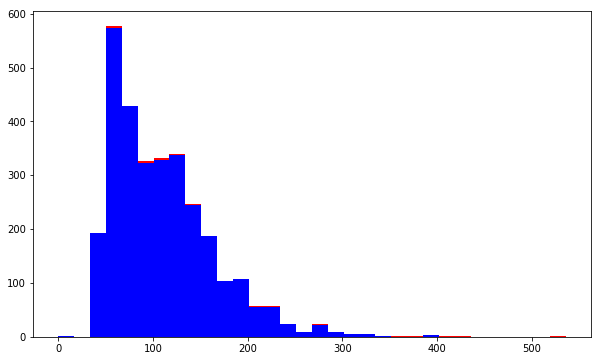

In [62]:
a = df.loc[df['anomaly1'] == 0, 'price_usd']
b = df.loc[df['anomaly1'] == 1, 'price_usd']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, color=['blue','red'], stacked=True)
plt.show()

#### Isolation Forest for anomaly detection.

In [69]:
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

# Build isolation forest
model = IsolationForest(contamination=outliers_fraction)
model.fit(data)

df['anomaly2'] = pd.Series(model.predict(data))

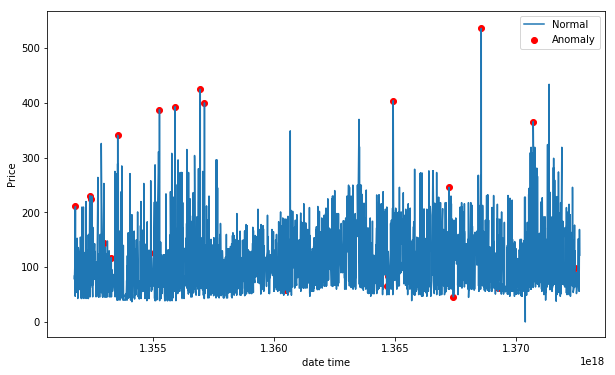

In [77]:
fig, ax = plt.subplots(figsize=(10,6))

a = df.loc[df['anomaly2'] == -1, ['date_time_int', 'price_usd']]

ax.plot(df['date_time_int'], df['price_usd'], label='Normal')
ax.scatter(a['date_time_int'], a['price_usd'], label='Anomaly', color='red')
plt.xlabel('date time')
plt.ylabel('Price')
plt.legend()

In [78]:
df['anomaly2'].unique()

array([ 1, -1], dtype=int64)

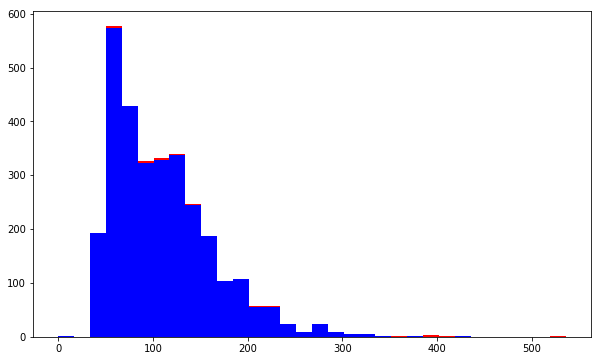

In [80]:
a = df.loc[df['anomaly2'] == 1, 'price_usd']
b = df.loc[df['anomaly2'] == -1, 'price_usd']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, color=['blue','red'], stacked=True)
plt.show()

#### Support Vector Machine-Based Anomaly Detection

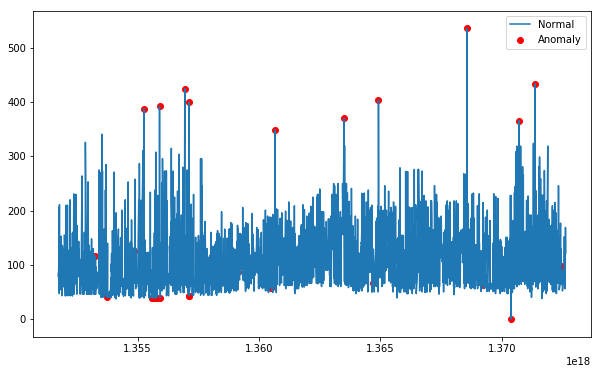

In [89]:
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

model = OneClassSVM(nu=outliers_fraction, gamma=0.01)
model.fit(data)

df['anomaly3'] = pd.Series(model.predict(data))

fig, ax = plt.subplots(figsize=(10,6))

a = df.loc[df['anomaly3'] == -1, ['date_time_int', 'price_usd']]

ax.plot(df['date_time_int'], df['price_usd'], label='Normal')
ax.scatter(a['date_time_int'], a['price_usd'], color='red', label='Anomaly')
plt.legend()

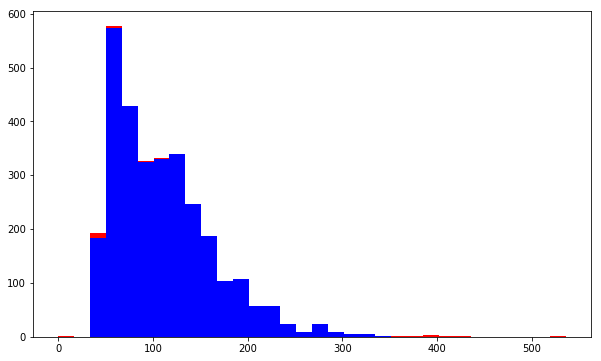

In [90]:
a = df.loc[df['anomaly3'] == 1, 'price_usd']
b = df.loc[df['anomaly3'] == -1, 'price_usd']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show();

#### Anomaly Detection using Gaussian Distribution

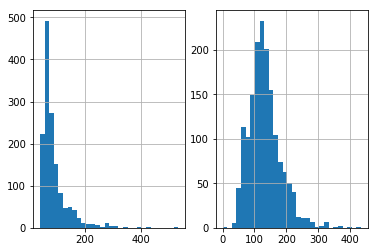

In [109]:
df_class0 = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
df_class1 = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']

fig, axs = plt.subplots(1,2)
df_class0.hist(ax=axs[0], bins=30)
df_class1.hist(ax=axs[1], bins=30);

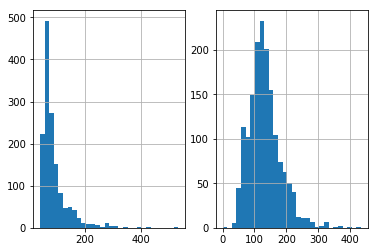

In [110]:
fig, axs = plt.subplots(1,2)
df_class0.hist(ax=axs[0], bins=30)
df_class1.hist(ax=axs[1], bins=30)

In [111]:
envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class0.values.reshape(-1,1)
envelope.fit(X_train)
df_class0 = pd.DataFrame(df_class0)
df_class0['deviation'] = envelope.decision_function(X_train)
df_class0['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(contamination = outliers_fraction) 
X_train = df_class1.values.reshape(-1,1)
envelope.fit(X_train)
df_class1 = pd.DataFrame(df_class1)
df_class1['deviation'] = envelope.decision_function(X_train)
df_class1['anomaly'] = envelope.predict(X_train)

Text(0.5,1,'Search Saturday Night')

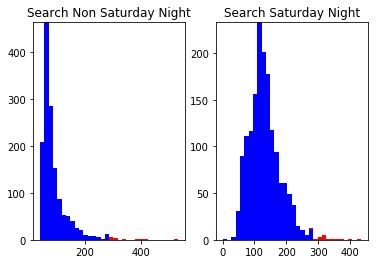

In [112]:
# plot the price repartition by categories with anomalies
a0 = df_class0.loc[df_class0['anomaly'] == 1, 'price_usd']
b0 = df_class0.loc[df_class0['anomaly'] == -1, 'price_usd']

a2 = df_class1.loc[df_class1['anomaly'] == 1, 'price_usd']
b2 = df_class1.loc[df_class1['anomaly'] == -1, 'price_usd']

fig, axs = plt.subplots(1,2)
axs[0].hist([a0,b0], bins=32, stacked=True, color=['blue', 'red'])
axs[1].hist([a2,b2], bins=32, stacked=True, color=['blue', 'red'])
axs[0].set_title("Search Non Saturday Night")
axs[1].set_title("Search Saturday Night")

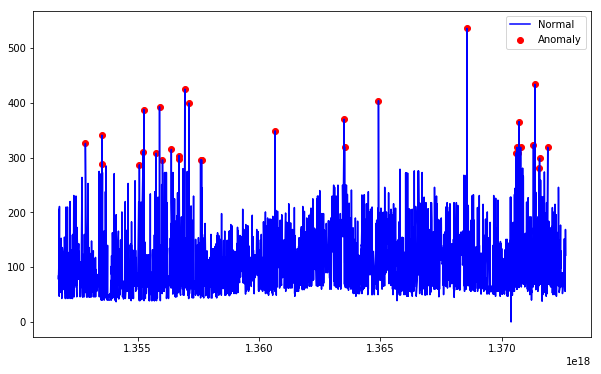

In [113]:
# add the data to the main 
df_class = pd.concat([df_class0, df_class1])
df['anomaly5'] = df_class['anomaly']
# df['anomaly5'] = np.array(df['anomaly22'] == -1).astype(int)
fig, ax = plt.subplots(figsize=(10, 6))
a = df.loc[df['anomaly5'] == -1, ('date_time_int', 'price_usd')] #anomaly
ax.plot(df['date_time_int'], df['price_usd'], color='blue', label='Normal')
ax.scatter(a['date_time_int'],a['price_usd'], color='red', label='Anomaly')
plt.legend()
plt.show();

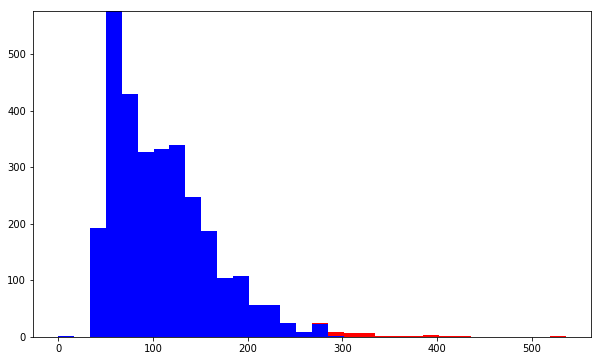

In [114]:
a = df.loc[df['anomaly5'] == 1, 'price_usd']
b = df.loc[df['anomaly5'] == -1, 'price_usd']

fig, axs = plt.subplots(figsize=(10, 6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show();

https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46


Susan Li